### 1. Save

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩(one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[42000:] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[:42000]
y_val = y_train[42000:] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[:42000]

In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 4s 94us/step - loss: 0.7908 - acc: 0.8028 - val_loss: 0.4263 - val_acc: 0.8836
Epoch 2/5
42000/42000 [==============================] - 3s 68us/step - loss: 0.3876 - acc: 0.8932 - val_loss: 0.3467 - val_acc: 0.9012
Epoch 3/5
42000/42000 [==============================] - 3s 62us/step - loss: 0.3313 - acc: 0.9068 - val_loss: 0.3120 - val_acc: 0.9117
Epoch 4/5
42000/42000 [==============================] - 3s 61us/step - loss: 0.3000 - acc: 0.9142 - val_loss: 0.2900 - val_acc: 0.9176
Epoch 5/5
42000/42000 [==============================] - 3s 62us/step - loss: 0.2778 - acc: 0.9217 - val_loss: 0.2720 - val_acc: 0.9238


In [6]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 20us/step

loss_and_metrics : [0.26269367237687113, 0.9242]


In [7]:
# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

### 2. Architecture

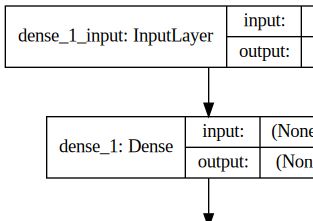

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 3. Load

In [9]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

In [10]:
# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

In [11]:
# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

In [12]:
# 3. 모델 사용하기
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 3, Predict : 3
True : 4, Predict : 4
True : 7, Predict : 7
True : 1, Predict : 1
True : 9, Predict : 9
